In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif

In [2]:
df=pd.read_csv('Fraud.csv')
# Shape the data
df.shape

(1048575, 11)

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


<AxesSubplot:>

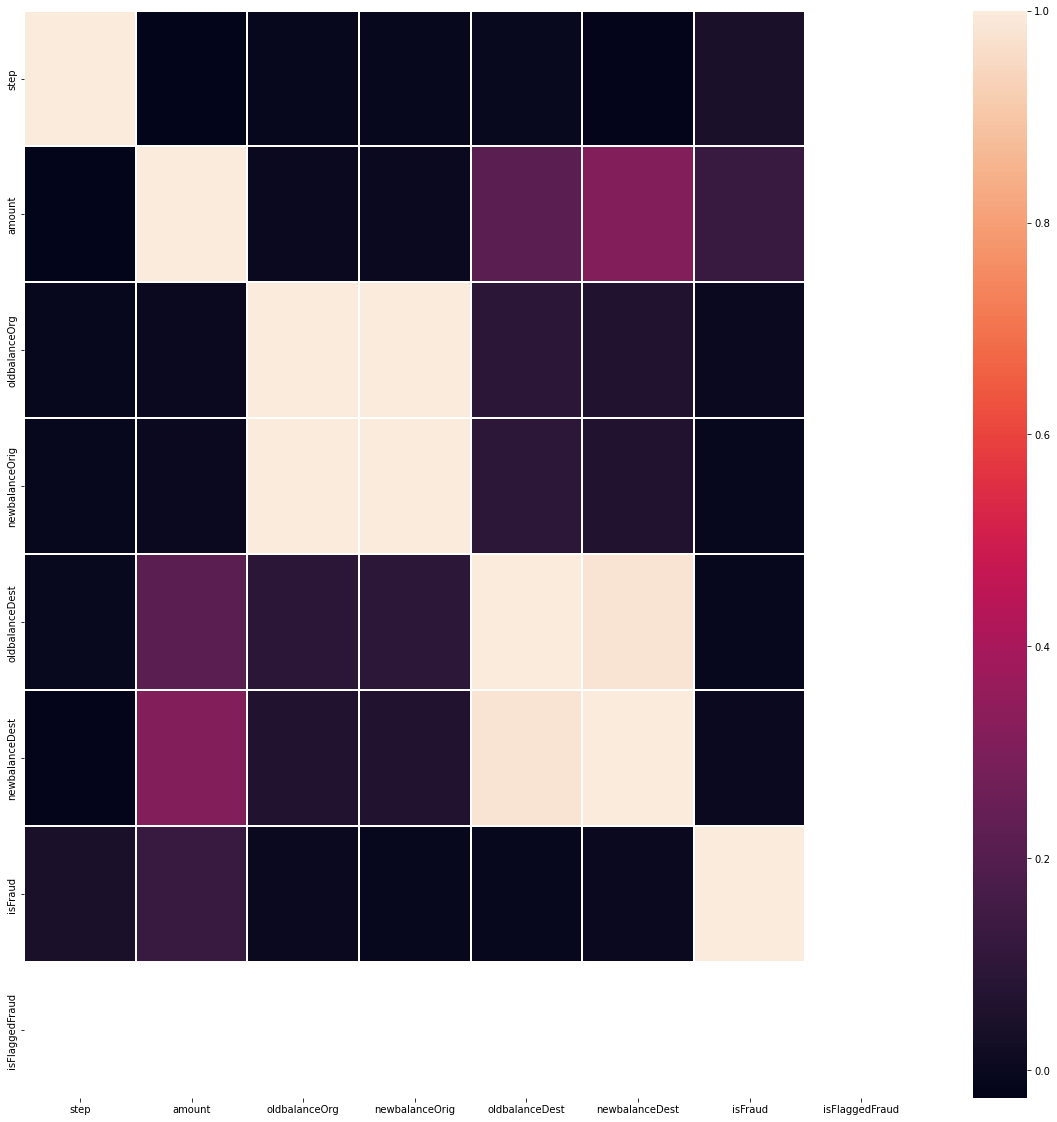

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(df.corr(),linewidths=0.3)

In [8]:
df.replace({'type':{'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5}}, inplace=True)

In [9]:
df.columns = df.columns.str.replace('\u00A0', '')

columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
df = df.drop(columns_to_drop, axis=1)

In [10]:
#correlation between label and other columns

from scipy import stats
total=0
count=0
for i in df.columns: 
    if i !='Label':
        corr, _=stats.pearsonr(df[i],df['isFraud'])
        total=total+1
            
        if corr >= 0.6 or corr <= -0.6:
            count=count+1
        print("Correlation between "+i+" and column 'isFraud', : %.3f" %corr)
                
print(count,total)
print(count/total)

Correlation between step and column 'isFraud', : 0.045
Correlation between type and column 'isFraud', : 0.015
Correlation between amount and column 'isFraud', : 0.129
Correlation between oldbalanceOrg and column 'isFraud', : 0.004
Correlation between newbalanceOrig and column 'isFraud', : -0.009
Correlation between oldbalanceDest and column 'isFraud', : -0.008
Correlation between newbalanceDest and column 'isFraud', : -0.000
Correlation between isFraud and column 'isFraud', : 1.000
1 8
0.125


<AxesSubplot:>

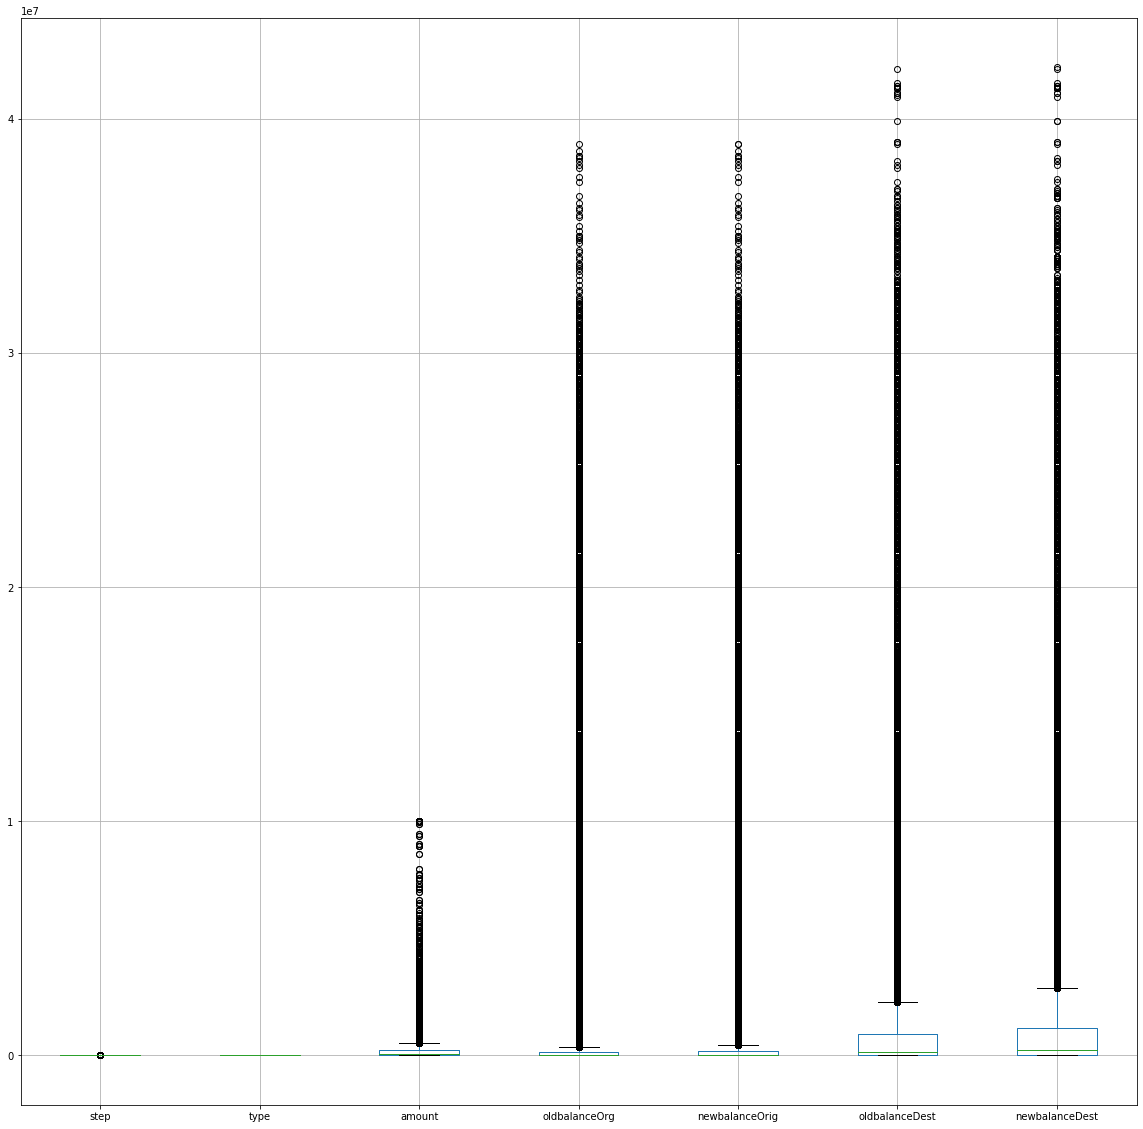

In [11]:
cols=list(df.columns)
box=df.boxplot(column=cols[:len(cols)-1], figsize = (20,20))
box

In [12]:
x=df.drop(['isFraud'],axis=1)
y=df['isFraud']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=69)
x_train.shape,x_test.shape

((838860, 7), (209715, 7))

<AxesSubplot:>

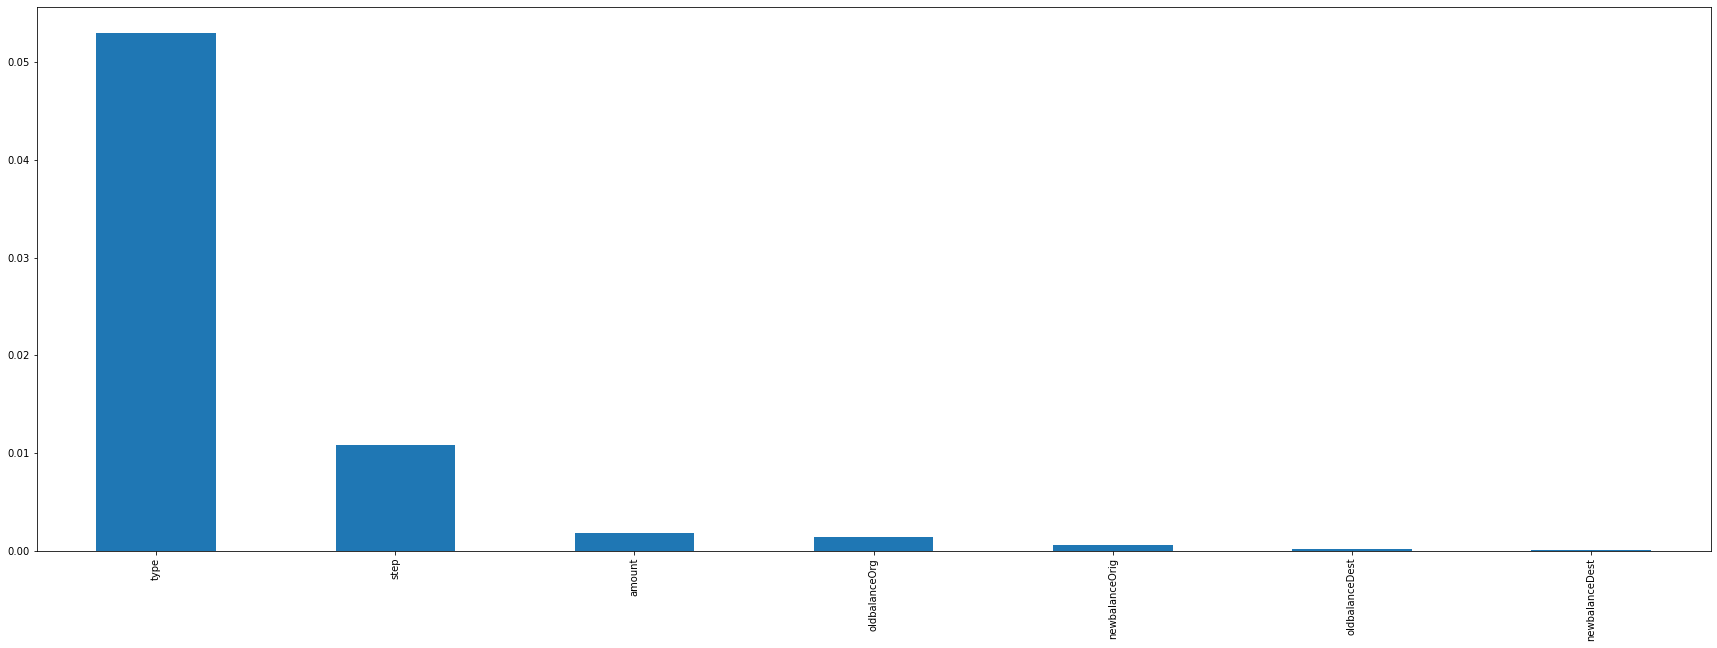

In [18]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(30,10))

In [19]:
mutual_info.sort_values(ascending=False)

type              0.052990
step              0.010792
amount            0.001855
oldbalanceOrg     0.001457
newbalanceOrig    0.000551
oldbalanceDest    0.000164
newbalanceDest    0.000039
dtype: float64

In [21]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
x_train_accuracy=model.predict(x_train)
accuracy_score(x_train_accuracy,y_train)

1.0

In [24]:
x_test_accuracy=model.predict(x_test)
accuracy_score(x_test_accuracy,y_test)

0.9996042247812508

In [26]:
print(classification_report(x_test_accuracy,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209502
           1       0.80      0.81      0.81       213

    accuracy                           1.00    209715
   macro avg       0.90      0.91      0.90    209715
weighted avg       1.00      1.00      1.00    209715



In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=3,criterion='entropy',random_state=1,max_depth=3)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=3,
                       random_state=1)

In [31]:
y_pred1 = classifier.predict(x_train)
y_pred2 = classifier.predict(x_test)
accuracy_score(y_train, y_pred1), accuracy_score(y_test,y_pred2)


(0.9992895119567031, 0.9993515008463868)

In [44]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)


0.96

In [39]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [40]:
classes=2
x,t= make_classification(100, 5, n_classes=classes, random_state=40, n_informative=2, n_clusters_per_class=1)
x_train,x_test,y_train,y_test= train_test_split(x, t, test_size=0.50)

model= svm.SVC(kernel='linear',random_state=0,C=1.0)
model.fit(x_train,y_train)

y2=model.predict(x_train)
y=model.predict(x_test)

score2=accuracy_score(y2,y_train)
print(score2)

1.0


In [47]:
score=accuracy_score(y,y_test)
print(score)


0.98
